In [86]:
import pandas as pd

In [87]:
import pandas as pd
from ftfy import fix_text
import unicodedata
import re
from io import StringIO

# ----------------------------------------
# 1. Read raw bytes (prevents decoding loss)
# ----------------------------------------
with open("final data.csv", "rb") as f:
    raw = f.read()

# ----------------------------------------------------------
# 2. Decode with latin1 (keeps bytes unchanged, no corruption)
# ----------------------------------------------------------
text = raw.decode("latin1")

# ----------------------------------------------------------
# 3. Fix mojibake (Û± → ı, AÛô → a, etc.)
# ----------------------------------------------------------
clean_text = fix_text(text)

# ----------------------------------------------------------
# 4. Load back into pandas
# ----------------------------------------------------------
df = pd.read_csv(StringIO(clean_text))

# ----------------------------------------------------------
# 5. OPTIONAL: your ASCII-cleaning function
# ----------------------------------------------------------
def ascii_clean(x):
    if x is None:
        return ""
    s = str(x)
    s = unicodedata.normalize("NFKD", s)      # split diacritics
    s = s.encode("ascii", "ignore").decode()  # remove accents
    s = re.sub(r"\s+", " ", s).strip()        # normalize whitespace
    return s

# Apply to all text columns
text_cols = df.select_dtypes(include="object").columns
for col in text_cols:
    df[col] = df[col].astype(str).apply(ascii_clean)

df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Cuisine
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,French
1,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Japanese
2,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Desserts
3,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,Japanese
4,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,Seafood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,5908749,Ceviz AUoacU,208,UAstanbul,"Koouyolu Mahallesi, Muhittin iisti_ndaUo Cadde...",Koouyolu,"Koouyolu, UAstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,3,4.2,Green,Very Good,1034,Turkey,Cafe
19710,5915807,Huqqa,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,4,3.7,Yellow,Good,661,Turkey,Italian
19711,5915807,Huqqa,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,4,3.7,Yellow,Good,661,Turkey,World Cuisine
19712,5916112,Aook Kahve,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,4,4.0,Green,Very Good,901,Turkey,Restaurant Cafe


In [88]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
Cuisine                 0
dtype: int64

In [89]:
df.dropna(inplace=True)

In [90]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
Cuisine                 0
dtype: int64

In [91]:
df.duplicated().sum()   

0

In [92]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
Cuisine                  object
dtype: object

In [93]:
original_df = df.copy()
original_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Cuisine
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,French
1,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Japanese
2,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Desserts
3,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,Japanese
4,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,Seafood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,5908749,Ceviz AUoacU,208,UAstanbul,"Koouyolu Mahallesi, Muhittin iisti_ndaUo Cadde...",Koouyolu,"Koouyolu, UAstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,3,4.2,Green,Very Good,1034,Turkey,Cafe
19710,5915807,Huqqa,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,4,3.7,Yellow,Good,661,Turkey,Italian
19711,5915807,Huqqa,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,4,3.7,Yellow,Good,661,Turkey,World Cuisine
19712,5916112,Aook Kahve,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,4,4.0,Green,Very Good,901,Turkey,Restaurant Cafe


## 1. Predict quality of new restaurants - CatBoost Regression

In [94]:
# -----------------------------------------------------------
# TASK 1 — CATBOOST REGRESSION
# -----------------------------------------------------------
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df1 = original_df.copy()

# Fix cuisine format
df1["Cuisines"] = df1["Cuisines"].str.replace(", ", " | ").astype(str)

categorical_cols = [
    "Country","City","Locality","Cuisines",
    "Has Table booking","Has Online delivery",
    "Is delivering now","Switch to order menu",
    "Price range"
]
df1[categorical_cols] = df1[categorical_cols].astype(str)

df1["Aggregate rating"] = pd.to_numeric(df1["Aggregate rating"], errors="coerce")
df1 = df1.dropna(subset=["Aggregate rating"])

features = [
    "Country","City","Locality","Cuisines","Price range",
    "Has Table booking","Has Online delivery","Is delivering now",
    "Switch to order menu","Votes","Longitude","Latitude"
]

X = df1[features]
y = df1["Aggregate rating"]

cat_features = [X.columns.get_loc(col) for col in categorical_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(
    iterations=800,
    learning_rate=0.05,
    depth=10,
    loss_function="RMSE",
    cat_features=cat_features,
    verbose=100
)

model.fit(X_train, y_train, eval_set=(X_test, y_test))
y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:", r2_score(y_test, y_pred))

0:	learn: 1.3484258	test: 1.3442780	best: 1.3442780 (0)	total: 133ms	remaining: 1m 46s
100:	learn: 0.2860877	test: 0.2922686	best: 0.2922686 (100)	total: 9.74s	remaining: 1m 7s
200:	learn: 0.2576723	test: 0.2719597	best: 0.2719597 (200)	total: 21.3s	remaining: 1m 3s
300:	learn: 0.2386716	test: 0.2609844	best: 0.2609844 (300)	total: 30.9s	remaining: 51.3s
400:	learn: 0.2241974	test: 0.2545634	best: 0.2545634 (400)	total: 40.1s	remaining: 39.9s
500:	learn: 0.2119650	test: 0.2489337	best: 0.2489337 (500)	total: 49.3s	remaining: 29.4s
600:	learn: 0.2015411	test: 0.2448552	best: 0.2448552 (600)	total: 59.7s	remaining: 19.8s
700:	learn: 0.1905359	test: 0.2401024	best: 0.2400890 (699)	total: 1m 9s	remaining: 9.8s
799:	learn: 0.1800310	test: 0.2360294	best: 0.2360294 (799)	total: 1m 19s	remaining: 0us

bestTest = 0.2360294005
bestIteration = 799

RMSE: 0.2360294012125491
R2 Score: 0.9719361288242968


c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [95]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Votes,84.261192
1,Cuisines,3.131509
2,Locality,2.637997
3,Price range,2.292791
4,Latitude,2.061174
5,Longitude,1.621027
6,City,1.569549
7,Country,1.143803
8,Has Online delivery,0.936113
9,Has Table booking,0.303536


## 2. Cuisine strategy - Clustering + Kruskal-Wallis

In [96]:
# -----------------------------------------------------------
# TASK 2 — CUISINE CLUSTERING + KRUSKAL-WALLIS
# -----------------------------------------------------------
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import kruskal

df2 = original_df.copy()

df2['Cuisines'] = df2['Cuisines'].astype(str)
df2_exp = df2.assign(Cuisines=df2['Cuisines'].str.split(r'\s*\|\s*|,\s*', regex=True)).explode("Cuisines")
df2_exp['Cuisines'] = df2_exp['Cuisines'].str.strip()

for col in ["Aggregate rating","Votes","Price range"]:
    df2_exp[col] = pd.to_numeric(df2_exp[col], errors='coerce')

cuisine_stats = df2_exp.groupby("Cuisines").agg(
    avg_rating=("Aggregate rating","mean"),
    avg_votes=("Votes","mean"),
    avg_price=("Price range","mean")
).reset_index()

X_cluster = cuisine_stats[["avg_rating","avg_votes","avg_price"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
cuisine_stats["cluster"] = kmeans.fit_predict(X_scaled)

# Kruskal test
groups = [df2_exp[df2_exp["Cuisines"]==c]["Aggregate rating"].dropna()
          for c in cuisine_stats["Cuisines"]]
H, p = kruskal(*groups)

print("KW H-statistic:", H)
print("p-value:", p)

cluster_summary = cuisine_stats.groupby("cluster").agg(
    avg_rating=("avg_rating","mean"),
    avg_votes=("avg_votes","mean"),
    avg_price=("avg_price","mean"),
    num_cuisines=("Cuisines","count")
)

cluster_summary

KW H-statistic: 12172.394096571967
p-value: 0.0


,avg_rating,avg_votes,avg_price,num_cuisines
cluster,,,,
0,3.802720,245.232476,3.337999,46
1,2.430417,110.060383,1.862666,30
2,3.825001,348.445338,2.183303,46
3,4.184633,860.348222,2.962164,24


In [97]:
cuisine_stats[cuisine_stats["cluster"]==0]['Cuisines']

1                African
7                  Asian
8           Asian Fusion
10            Australian
15               Belgian
21             Brazilian
23               British
26               Burmese
30             Cantonese
36          Contemporary
41                  Deli
44               Dim Sum
46           Drinks Only
47                Durban
50              Filipino
51           Finger Food
53                French
54                Fusion
57     Gourmet Fast Food
59                 Grill
67         International
72              Japanese
74              Kashmiri
75                 Kebab
77                  Kiwi
78                Korean
83                 Malay
84             Malaysian
86           Mangalorean
89        Middle Eastern
102            Pakistani
107             Peruvian
109           Portuguese
110             Pub Food
117             Scottish
118              Seafood
119          Singaporean
121        South African
122       South American
127           Sri Lankan


In [98]:
cuisine_stats[cuisine_stats["cluster"]==1]['Cuisines']

0             Afghani
6            Armenian
9            Assamese
11             Awadhi
13             Bakery
17          Beverages
20            Biryani
29           Canadian
34            Chinese
39     Cuisine Varies
42           Desserts
49          Fast Food
62       Healthy Food
64          Ice Cream
81           Lucknowi
90            Mineira
91             Mithai
94           Moroccan
95            Mughlai
97           Nepalese
99      North Eastern
100      North Indian
101             Oriya
106           Persian
108             Pizza
113         Raw Meats
115             Salad
123      South Indian
129       Street Food
138           Tibetan
Name: Cuisines, dtype: object

In [99]:
cuisine_stats[cuisine_stats["cluster"]==2]['Cuisines']

2               American
3                 Andhra
4                Arabian
5              Argentine
12                   BBQ
14              Bar Food
16               Bengali
19                Bihari
22             Breakfast
24            Bubble Tea
25                Burger
27                  Cafe
28                 Cajun
32        Charcoal Grill
35        Coffee and Tea
37           Continental
40                 Curry
43                Di_ner
45                 Diner
52        Fish and Chips
58                 Greek
60              Gujarati
63            Hyderabadi
65                Indian
70               Italian
73                Juices
76                Kerala
79        Latin American
80              Lebanese
82         Maharashtrian
85               Malwani
88               Mexican
92     Modern Australian
96                  Naga
104           Patisserie
111           Rajasthani
116             Sandwich
120            Soul Food
124             Southern
132            Taiwanese


In [100]:
cuisine_stats[cuisine_stats["cluster"]==3]['Cuisines']

18              Bi_rek
31           Caribbean
33           Chettinad
38               Cuban
48            European
55              German
56                Goan
61            Hawaiian
66          Indonesian
68             Iranian
69               Irish
71              Izgara
87       Mediterranean
93       Modern Indian
98        New American
103              Parsi
105          Peranakan
112              Ramen
114    Restaurant Cafe
125       Southwestern
126            Spanish
130              Sunda
136            Tex-Mex
143            Western
Name: Cuisines, dtype: object

## 3. Recommendation System (Content-Based)

In [101]:
# -----------------------------------------------------------
# TASK 3 — CONTENT-BASED RECOMMENDER (DEDUPED + FIXED)
# -----------------------------------------------------------

df3 = original_df.copy()

# Remove duplicates - keep highest voted version of each restaurant
df3 = df3.sort_values("Votes", ascending=False)
df3 = df3.drop_duplicates(subset=["Restaurant Name"], keep="first")

# Reset index so recommender matches positions correctly
df3 = df3.reset_index(drop=True)

# Fill missing
df3["Cuisines"] = df3["Cuisines"].fillna("Unknown")

# ---------------------------------------
# Vectorize cuisines (TF-IDF)
# ---------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df3["Cuisines"])

# ---------------------------------------
# Numeric features
# ---------------------------------------
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

num_features = df3[["Price range","Aggregate rating","Longitude","Latitude"]]

scaler = MinMaxScaler()
num_scaled = scaler.fit_transform(num_features)

# Combine sparse + dense
combined_features = hstack([tfidf_matrix, num_scaled]).tocsr()

# ---------------------------------------
# Nearest Neighbor recommender
# ---------------------------------------
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=15, metric="cosine")
nn.fit(combined_features)

# ---------------------------------------
# Recommendation function
# ---------------------------------------
def recommend_restaurants(name, n=10):
    if name not in df3["Restaurant Name"].values:
        return f"'{name}' not found."

    idx = df3.index[df3["Restaurant Name"] == name][0]

    dist, ind = nn.kneighbors(combined_features[idx], n_neighbors=n+1)

    rec = ind[0][1:]  # skip itself

    return df3.loc[rec, ["Restaurant Name","Cuisines","Aggregate rating","Price range","City"]]

In [102]:
import pandas as pd

recs = recommend_restaurants("Le Petit Souffle", 10)
recs

,Restaurant Name,Cuisines,Aggregate rating,Price range,City
4934,Tokyo Mon Amour,"Japanese, French",3.1,4,New Delhi
3619,Rhubarb Le Restaurant,French,3.9,4,Singapore
3515,Jaan,French,3.8,4,Singapore
400,Bonne Bouche,"Italian, French",4.1,3,New Delhi
972,Restaurant Gordon Ramsay,French,4.7,4,London
1441,Le Cirque - The Leela Palace,"French, Italian",3.8,4,New Delhi
509,Izakaya Kikufuji,Japanese,4.5,3,Makati City
2128,The French by Simon Rogan - The Midland,French,4.3,4,Manchester
1097,Baba Au Rhum,"Italian, French, Cafe",4.5,3,Goa
2510,Restaurant Mosaic @ The Orient,French,4.9,4,Pretoria


In [103]:
recommend_restaurants("Exotica", 10)

,Restaurant Name,Cuisines,Aggregate rating,Price range,City
421,Spice Caves,"North Indian, Chinese, Mughlai",4.2,3,Lucknow
754,Colours by Royal Cafe - Royal Inn,"North Indian, Mughlai, Chinese",4.2,3,Lucknow
1571,Pinch Of Spice,"North Indian, Chinese, Mughlai",4.2,3,Agra
957,The Yellow Chilli,"Mughlai, North Indian, Chinese",4.4,3,Ludhiana
2906,Kalol- Bar Te Kitchen,"North Indian, Mughlai, Chinese",4.0,3,New Delhi
1313,RDX,"North Indian, Chinese, Mughlai",3.9,3,New Delhi
927,Pindi,"North Indian, Mughlai, Chinese",3.8,3,New Delhi
32,My Bar Headquarters,"North Indian, Mughlai, Chinese",3.7,3,New Delhi
1698,Raasa The Luxuriate Fine Dine,"North Indian, Mughlai, Chinese",3.7,3,New Delhi
841,Khidmat,"North Indian, Mughlai, Chinese",3.6,3,New Delhi


In [104]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def intra_list_similarity(sim_matrix, rec_indices):
    sub = sim_matrix[rec_indices][:, rec_indices]
    n = len(rec_indices)
    return (np.sum(sub) - n) / (n*(n-1))

## 4. Ranking partners - LightGBM Ranker

In [105]:
# ============================
# TASK 4 — RANKING RESTAURANTS
# USING LIGHTGBM RANKER (CLEAN + OPTIMIZED)
# ============================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRanker

# ----------------------------------------------------
# 1. LOAD ORIGINAL DATA (NO CUISINE EXPLOSION)
# ----------------------------------------------------
df = original_df.copy()   # <--- IMPORTANT: use original dataset before explosion

# ----------------------------------------------------
# REMOVE TRUE DUPLICATES
# based on Restaurant ID (keep the row with highest votes)
# ----------------------------------------------------
df = df.sort_values("Votes", ascending=False)
df = df.drop_duplicates(subset="Restaurant ID", keep="first")

# ----------------------------------------------------
# 2. CLEAN NUMERIC COLUMNS
# ----------------------------------------------------
df["Aggregate rating"] = pd.to_numeric(df["Aggregate rating"], errors="coerce").fillna(0)
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce").fillna(0)
df["Price range"] = pd.to_numeric(df["Price range"], errors="coerce").fillna(1)


# ----------------------------------------------------
# 3. QUALITY SCORE (Continuous)
# ----------------------------------------------------
df["quality_score"] = (
    df["Aggregate rating"] * 0.7 +
    np.log1p(df["Votes"]) * 0.3
)


# ----------------------------------------------------
# 4. QUALITY GRADE (LightGBM Ranker Target)
# Grades: 0 = worst, 3 = best
# ----------------------------------------------------
df["quality_grade"] = pd.qcut(
    df["quality_score"], q=4, labels=[0, 1, 2, 3]
).astype(int)

y = df["quality_grade"]

# ----------------------------------------------------
# 5. LABEL ENCODE CATEGORICAL COLUMNS
# (no exploded rows, safe for ranking)
# ----------------------------------------------------
cat_cols = [
    "City", "Locality", "Cuisines",
    "Has Table booking", "Has Online delivery",
    "Is delivering now", "Switch to order menu"
]

df = df.copy()
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))


# ----------------------------------------------------
# 6. PREPARE FEATURES
# ----------------------------------------------------
features = [
    "City", "Locality", "Cuisines",
    "Price range", "Aggregate rating",
    "Votes", "Longitude", "Latitude",
    "Has Table booking", "Has Online delivery",
    "Is delivering now", "Switch to order menu"
]

X = df[features]


# ----------------------------------------------------
# 7. GROUP BY LOCALITY FOR LEARNING TO RANK
# ----------------------------------------------------
group_df = df.groupby("Locality").size().values


# ----------------------------------------------------
# 8. TRAIN LIGHTGBM RANKER
# ----------------------------------------------------
ranker = LGBMRanker(
    objective="lambdarank",
    metric="ndcg",
    n_estimators=300,
    learning_rate=0.05,
    num_leaves=31,
    label_gain=[0, 1, 2, 3],  # matches quality_grade classes
)

ranker.fit(
    X, y,
    group=group_df
)


# ----------------------------------------------------
# 9. PREDICT SCORES & RANK WITHIN LOCALITY
# ----------------------------------------------------
df["pred_score"] = ranker.predict(X)

df["rank_in_locality"] = df.groupby("Locality")["pred_score"].rank(
    ascending=False,
    method="dense"
)


# ----------------------------------------------------
# 10. FINAL RANKED OUTPUT (NO DUPLICATES)
# ----------------------------------------------------
final_ranking = df.sort_values(["Locality", "rank_in_locality"])[[
    "Restaurant ID",
    "Restaurant Name",
    "City",
    "Locality",
    "Cuisines",
    "Aggregate rating",
    "Votes",
    "quality_score",
    "quality_grade",
    "pred_score",
    "rank_in_locality"
]]

final_ranking.head(20)

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Aggregate rating,Votes,quality_score,quality_grade,pred_score,rank_in_locality
4961,90744,Exotica,54,0,1290,4.3,3374,5.447245,3,11.752671,1.0
5369,15239,Basant Restaurant,70,1,1348,3.6,93,3.882988,2,-1.288350,1.0
5942,310281,Haldiram's,88,2,1565,3.1,117,3.601205,2,-5.310159,1.0
5667,18287358,Food Cloud,88,3,757,0.0,2,0.329584,0,-12.004534,1.0
1156,5704255,Famous Dave's Barbecue,0,4,6,4.6,376,4.999674,3,12.190136,1.0
1155,18212135,Denny's,0,4,6,4.6,207,4.821261,3,12.190136,1.0
1251,5600457,Gazebo,117,5,1007,4.1,372,4.646474,3,11.378630,1.0
1245,5600424,Kamat,117,5,1012,3.9,285,4.426798,3,10.601946,2.0
1247,5602751,Vadakkan Pepper,117,5,1699,3.8,210,4.265557,3,8.714553,3.0
5259,18217475,Asia Kitchen by Mainland China,63,6,121,4.6,945,5.275673,3,11.055412,1.0


In [106]:
from sklearn.metrics import ndcg_score

# true relevance
y_true = y.values.reshape(1, -1)

# predicted relevance
y_pred = final_ranking["pred_score"].values.reshape(1, -1)

print("NDCG@10:", ndcg_score(y_true, y_pred, k=10))
print("NDCG@50:", ndcg_score(y_true, y_pred, k=50))
print("NDCG@100:", ndcg_score(y_true, y_pred, k=100))

NDCG@10: 0.8157768832953044
NDCG@50: 0.7891881352610043
NDCG@100: 0.8033478219924608


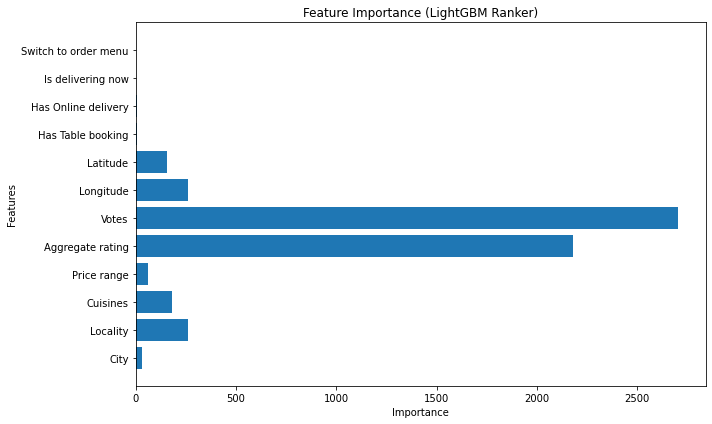

In [107]:
import matplotlib.pyplot as plt

# actual features used for training
features = X.columns.tolist()

# actual importances from trained model
importances = ranker.feature_importances_

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance (LightGBM Ranker)")
plt.tight_layout()
plt.show()

In [108]:
pd.DataFrame({
    'Feature' : features,
    'Importance' : importances
})

,Feature,Importance
0,City,30
1,Locality,262
2,Cuisines,181
3,Price range,60
4,Aggregate rating,2180
5,Votes,2705
6,Longitude,263
7,Latitude,158
8,Has Table booking,9
9,Has Online delivery,7
